# EV Enerji Tüketimi EDA
Gerçek araç verilerinin ilk incelemesi ve kalitesinin anlaşılması


## 1) Kurulum ve Kütüphaneler

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2) Veri Yükleme ve İlk İnceleme

In [134]:
df = pd.read_csv('ev_dataset.csv')
df.shape

(14658, 38)

In [135]:
# Veri Seti Bilgileri
print("Veri Seti Bilgileri")
df.info()

Veri Seti Bilgileri
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14658 entries, 0 to 14657
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Time_Stamp               14658 non-null  object 
 1   latitude                 14658 non-null  float64
 2   longitude                14658 non-null  float64
 3   altitude                 14658 non-null  float64
 4   PACK_Q_SOC_INTERNAL      14658 non-null  float64
 5   PACK_Q_SOC_TRIMMED       14658 non-null  float64
 6   CELL_V_MIN_VAL           14658 non-null  float64
 7   CELL_V_MAX_VAL           14658 non-null  float64
 8   CELL_V_AVG               14658 non-null  float64
 9   PACK_V_SUM_OF_CELLS      14658 non-null  float64
 10  vehicle_speed            14658 non-null  float64
 11  Torque_Measured          14658 non-null  float64
 12  Torque_Request           14658 non-null  float64
 13  MotorTemperature         14658 non-null  float64
 14  Od

In [136]:
# Sayısal değişkenler için özet istatistikler
print("\n📊 Sayısal Değişkenlerin İstatistikleri")
display(df.describe().T)


📊 Sayısal Değişkenlerin İstatistikleri


,count,mean,std,min,25%,50%,75%,max
latitude,14658.0,39.749871,1.766312e-03,39.747075,39.748334,39.750004,39.751618,39.752448
longitude,14658.0,30.477740,2.398704e-03,30.474712,30.474912,30.477598,30.480306,30.481239
altitude,14658.0,815.318863,9.000429e+00,793.800000,806.600000,815.000000,823.500000,833.100000
PACK_Q_SOC_INTERNAL,14658.0,56.615378,1.015699e+01,34.730000,49.891500,57.460000,65.723250,72.770000
PACK_Q_SOC_TRIMMED,14658.0,55.219026,1.046189e+01,32.680000,48.291500,56.090000,64.603250,71.860000
CELL_V_MIN_VAL,14658.0,3259.896965,4.665780e+01,3007.300000,3237.110000,3271.620000,3292.800000,3340.400000
CELL_V_MAX_VAL,14658.0,3270.303775,4.502610e+01,3060.700000,3247.555000,3280.800000,3302.400000,3393.500000
CELL_V_AVG,14658.0,3266.425553,4.532801e+01,3049.100000,3244.070000,3277.400000,3298.500000,3346.500000
PACK_V_SUM_OF_CELLS,14658.0,48.997288,6.804814e-01,45.700000,48.700000,49.200000,49.500000,50.200000
vehicle_speed,14658.0,19.890413,8.274843e+00,0.000000,14.291667,16.606061,24.530080,54.909091


In [137]:
# Kategorik değişkenler için özet istatistikler
print("\n🔤 Kategorik Değişkenlerin İstatistikleri")
display(df.describe(include=['object']).T)


🔤 Kategorik Değişkenlerin İstatistikleri


,count,unique,top,freq
Time_Stamp,14658,13831,12/17/2024 11:02,60
right_indicator,14658,2,OFF,13909
left_indicator_st,14658,2,OFF,13805
brightness_st,14658,2,Night mode,14656
charging_status,14658,1,OFF,14658
charging_plug_feedback,14658,1,OFF,14658
park_brake_st,14658,2,OFF,14347
R_position_selected,14658,2,Not pressed,14650
D_position_selected,14658,2,Pressed,14529
Load,14658,2,Loaded,7853


In [138]:
# Eksik Veri Sayıları
print("Eksik Veri Sayısı:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Eksik Veri Sayısı:
cabin_temperature          4665
outdoor_temperature        4665
slope                      4665
estimated_charging_time    4665
dtype: int64


**Not** : Veri setinde `cabin_temperature`, `outdoor_temperature`, `slope` ve `estimated_charging_time` sütunlarında yaklaşık %32 oranında eksik değer bulunmaktadır. Bu eksikliklerin nedeni mevsimsel farklılıktır: Yaz (Summer) döneminde bu sensörlerden ölçüm alınmamış, yalnızca Kış (Winter) döneminde kayıt yapılmıştır. Bu nedenle eksik değerler sensör hatasından değil, deney tasarımından kaynaklanmaktadır.

## 3) Feature Engineering

### 3.1 Eksik Slope Değerlerinin Hesaplanması
 **Not:** Yaz (Summer) döneminde `slope` sensöründen veri kaydedilmediği için bu sütun eksik kalmıştır.
Ancak veri setinde `latitude`, `longitude` ve `altitude` sütunları bulunduğundan, bu bilgiler kullanılarak
gerçek yol eğimi hesaplanabilir. Burada eğim şu formülle hesaplanmıştır:

\[
slope = \frac{Δh}{Δd} \times 100
\]

- Δh: İki ardışık satır arasındaki yükseklik farkı (altitude değişimi, metre)  
- Δd: İki ardışık nokta arasındaki mesafe (haversine formülü ile hesaplanan, metre)  

Bu yöntem sayesinde yaz verilerinde eksik olan slope değerleri doldurulmuş, kış verilerindeki
mevcut sensör ölçümleri ise korunmuştur.


In [139]:
# Haversine fonksiyonu (metre cinsinden)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371000  # Dünya yarıçapı (metre)
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    dphi = np.radians(lat2 - lat1)
    dlambda = np.radians(lon2 - lon1)
    a = np.sin(dphi/2)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(dlambda/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

# Slope hesaplama
df["delta_alt"] = df["altitude"].diff()
df["delta_dist"] = haversine(
    df["latitude"].shift(), df["longitude"].shift(),
    df["latitude"], df["longitude"]
)

# slope = Δh / Δd * 100 (%)
df["slope_calc"] = (df["delta_alt"] / df["delta_dist"]) * 100

# Sonsuz değerleri NaN yap
df["slope_calc"] = df["slope_calc"].replace([np.inf, -np.inf], np.nan)

# Eksik slope_calc'leri 0 ile doldur
df["slope_calc"] = df["slope_calc"].fillna(0)

# Eksik slope varsa hesaplanan değerle doldur
df["slope"] = df["slope"].fillna(df["slope_calc"])
df = df.dropna(subset=["delta_alt", "delta_dist"]).reset_index(drop=True)

In [140]:
# Eksik Veri Sayıları
print("Eksik Veri Sayısı:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Eksik Veri Sayısı:
cabin_temperature          4664
outdoor_temperature        4664
estimated_charging_time    4664
dtype: int64


### 3.2 Zaman Damgası Parsleme
Veri setindeki `Time_Stamp` alanı birden fazla tarih-saat formatı içerdiği için
önce robust bir pars işlemi yapıldı

In [141]:
df["Time_Stamp"] = pd.to_datetime(df["Time_Stamp"], format="mixed", errors="coerce")

### 3.3 Sürüş Dinamikleri

Speed (m/s), Acceleration (m/s^2)


In [142]:
# Zaman farkı (saniye cinsinden)
df["Time_Stamp"] = pd.to_datetime(df["Time_Stamp"], errors="coerce")
df["delta_t"] = df["Time_Stamp"].diff().dt.total_seconds()

df["speed_ms"] = df["vehicle_speed"] * (1000/3600.0)

df["acc_ms2"] = df["speed_ms"].diff() / df["delta_t"].replace(0, np.nan)
df["acc_ms2"] = df["acc_ms2"].fillna(0).clip(-5, 5)

In [143]:
#Power (W) & Energy (Wh)
df["power_W"] = (df["DC_Link_Voltage"].astype(float) * df["DC_Link_Current"].astype(float))
df["energy_Wh"] = (df["power_W"] * df["delta_t"]) / 3600.0
df["cum_energy_Wh"] = df["energy_Wh"].fillna(0).cumsum()

In [144]:
#Hücreler arası voltaj farkı
df["cell_voltage_diff"] = df["CELL_V_MAX_VAL"] - df["CELL_V_MIN_VAL"]

Hücreler arası dengesizliği  gösterir.

Yüksek fark → paket yaşlanması, performans düşüşü veya anlık yüksek akım koşullarını işaret edebilir.


Enerji tüketimi ve menzil tahmininde, batarya sağlığı ve verimlilik üzerinde dolaylı etkili olabilir.

## 4) Hedef Değişkenin Belirlenmesi: SOC Farkı

Buu çalışmada enerji tüketimi hedef değişkeni, batarya doluluk oranındaki değişim (**ΔSoC**) üzerinden tanımlanmıştır.  
SOC’nin kendisi kümülatif bir süreç değişkeni olduğundan, tek bir anda doğrudan tahmin edilmesi zordur.  
Bunun yerine **anlık SoC değişim hızı (`soc_net_per_s`)** hedef değişken olarak seçilmiştir.  
###  Neden ΔSoC Kullanıyoruz?
-  **Fiziksel gerekçe:**  
  SOC, geçmiş değerlerin birikimine bağlıdır. Mutlak SOC yerine, anlık tüketim/kazanımı gösteren ΔSoC daha doğrudan enerji tüketimini yansıtır.  

-  **Makine öğrenmesi açısından:**  
  - Klasik algoritmalar (**Random Forest, XGBoost**) tek satırlık gözlemlerden öğrenir, geçmişi bilmez.  
  - Bu nedenle **anlık ΔSoC** gibi hedefler daha uygun ve kararlıdır.  
  - Mutlak SOC tahmini için zaman serisi tabanlı derin öğrenme modelleri (**LSTM, GRU, Transformer**) gerekir.  

###  Modelleme Stratejisi
1. **Kısa vadeli tahmin (anlık tüketim analizi):**  
   - İlk olarak **Random Forest** ve **XGBoost** eğitilecektir.  
   - Bu modeller, ΔSoC ile çevresel ve sürüş faktörleri (hız, ivme, eğim, sıcaklık vb.) arasındaki ilişkiyi güçlü şekilde öğrenebilir.  

2. **Uzun vadeli tahmin (SOC serisi & menzil):**  
   - Daha sonra **yapay sinir ağları (NN)** denenecektir.  
   

### 4.1 Hedef Değişkenin Dönüşümleri

In [145]:
df["SoC"] = df["PACK_Q_SOC_TRIMMED"]

# SOC farkı (pozitif → azalma, tüketim)
delta_soc_raw = df["SoC"].diff()

#    SoC düşüşü → tüketim; SoC artışı → kazanım
cons_pp      = (-delta_soc_raw).clip(lower=0)             # pp
gain_pp      = ( delta_soc_raw).clip(lower=0)             # pp
dt_sec       = df["delta_t"].replace(0, np.nan)           # 0'a bölme önlemi

df["soc_cons_per_s"] = (cons_pp / dt_sec).fillna(0.0)   # hedef 1 (pp/s)
df["soc_gain_per_s"] = (gain_pp / dt_sec).fillna(0.0)   # hedef 2 (pp/s)
df["soc_net_per_s"]  = df["soc_cons_per_s"] - df["soc_gain_per_s"]  # opsiyonel tek hedef (pp/s)

# Kontrol
display(df[["Time_Stamp","SoC","soc_cons_per_s","soc_gain_per_s","soc_net_per_s"]].head(10))

,Time_Stamp,SoC,soc_cons_per_s,soc_gain_per_s,soc_net_per_s
0,2024-06-26 17:28:34,60.030,0.000,0.0,0.000
1,2024-06-26 17:28:35,60.022,0.008,0.0,0.008
2,2024-06-26 17:28:36,60.020,0.002,0.0,0.002
3,2024-06-26 17:28:37,60.020,-0.000,0.0,-0.000
4,2024-06-26 17:28:38,60.016,0.004,0.0,0.004
5,2024-06-26 17:28:39,60.010,0.006,0.0,0.006
6,2024-06-26 17:28:40,60.006,0.004,0.0,0.004
7,2024-06-26 17:28:41,60.000,0.006,0.0,0.006
8,2024-06-26 17:28:42,59.990,0.010,0.0,0.010
9,2024-06-26 17:28:43,59.982,0.008,0.0,0.008


Text(0, 0.5, 'Count')

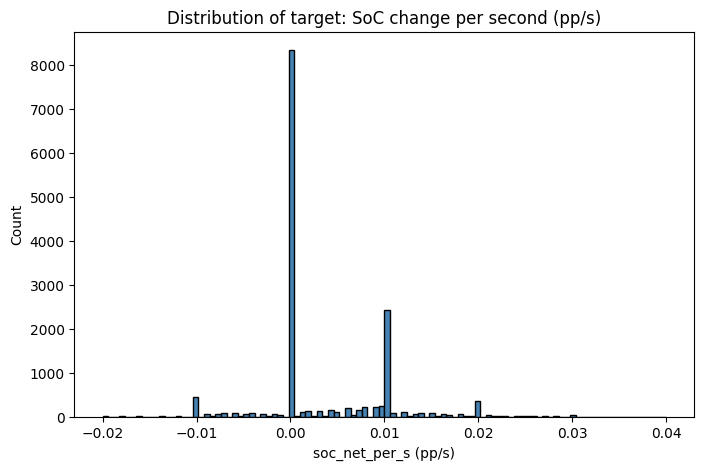

In [146]:
plt.figure(figsize=(8,5))
plt.hist(df["soc_net_per_s"].dropna(), bins=100, color="steelblue", edgecolor="black")
plt.title("Distribution of target: SoC change per second (pp/s)")
plt.xlabel("soc_net_per_s (pp/s)")
plt.ylabel("Count")

Veri setinde batarya **State of Charge (SoC)** değerinin saniyelik değişimi (ΔSoC/s) hedef değişken (target) olarak tanımlanmıştır. Ancak bu değişken:  
- Çoğu durumda **0 değerinde** olup, yalnızca belirli anlarda küçük değişimler göstermektedir.  
- Bu durum, hedef dağılımında **dengesizlik** oluşturmakta ve modelin öğrenme kapasitesini sınırlamaktadır.  

Bu sorunu gidermek ve modeli farklı zaman ölçeklerinde daha anlamlı sinyallerle beslemek amacıyla hedef değişken üzerinde çeşitli dönüşümler uygulanmıştır.  


### 4.2 Seçilen Zaman Ölçekleri: 5s, 10s, 30s, 60s

In [147]:
# --- Rolling smoothing (kısa vadeli pürüzsüzleştirme) ---
df["soc_net_per_s_smooth5"]  = df["soc_net_per_s"].rolling(window=5, center=True).mean().bfill().ffill()
df["soc_net_per_s_smooth10"] = df["soc_net_per_s"].rolling(window=10, center=True).mean().bfill().ffill()

# --- Pencere ortalamaları (daha uzun vadeli trendler) ---
df["soc_net_per_s_30s"] = df["soc_net_per_s"].rolling(window=30, center=False).mean().fillna(0)
df["soc_net_per_s_60s"] = df["soc_net_per_s"].rolling(window=60, center=False).mean().fillna(0)


- **5 saniye ve 10 saniye (smoothing):**  
  Kısa vadeli dalgalanmaları yumuşatarak gürültüyü azaltmakta, ancak sürüş dinamiklerini (hızlanma, frenleme vb.) korumaktadır.  
  - *5s*: Daha hızlı tepki verir, anlık değişimleri büyük ölçüde yansıtır.  
  - *10s*: Daha güçlü yumuşatma sağlar, kısa süreli dalgalanmaları önemli ölçüde bastırır.  

- **30 saniye ve 60 saniye (window):**  
  Daha uzun vadeli eğilimleri temsil etmekte ve ortalama tüketim trendini ortaya çıkarmaktadır.  
  - *30s*: Orta vadeli eğilimleri gösterir, kısa dalgalanmalar önemli ölçüde azalır.  
  - *60s*: Neredeyse tamamen trend odaklıdır, uzun vadeli tüketim veya menzil tahminine uygundur.  
---------------

- **Smoothing (Rolling Mean, `center=True`):**  
  - Her bir değeri, etrafındaki küçük bir pencerenin (ör. 5–10 saniye) ortalamasıyla günceller.  
  - Gürültüyü azaltır, eğilimi korur.  
  - Daha düzgün bir sinyal elde edilir ancak küçük bir zaman kayması (lag) oluşabilir.  
  - Analiz ve model geliştirme aşamalarında faydalıdır; fakat gerçek zamanlı uygulamalarda ileriye bakma (`center=True`) tercih edilmez.  

- **Window (Rolling Mean, `center=False`):**  
  - Her bir değeri yalnızca geçmişteki pencerenin (ör. son 30–60 saniye) ortalamasıyla günceller.  
  - Anlık dalgalanmalar tamamen bastırılır, daha kararlı bir tüketim profili elde edilir.  
  - Gelecek verisine bakılmadığı için **gerçek zamanlı uygulamalar** için daha uygundur.  


**Hedef Değişken Dağılımı 5 sn**

Text(0, 0.5, 'Count')

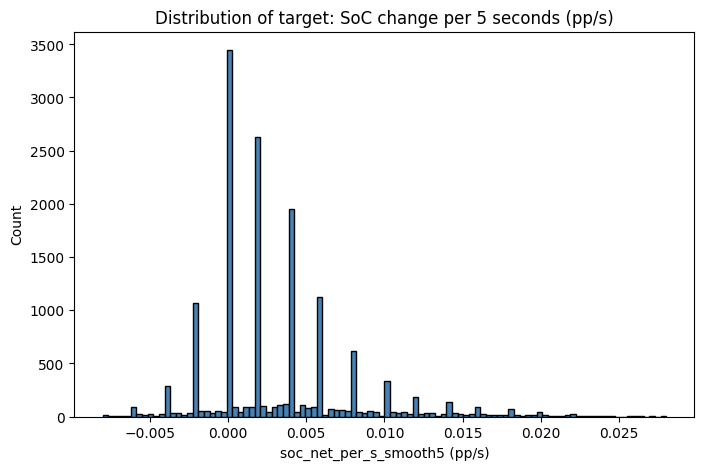

In [148]:
plt.figure(figsize=(8,5))
plt.hist(df["soc_net_per_s_smooth5"].dropna(), bins=100, color="steelblue", edgecolor="black")
plt.title("Distribution of target: SoC change per 5 seconds (pp/s)")
plt.xlabel("soc_net_per_s_smooth5 (pp/s)")
plt.ylabel("Count")

**Hedef Değişken Dağılımı 10 sn**

Text(0, 0.5, 'Count')

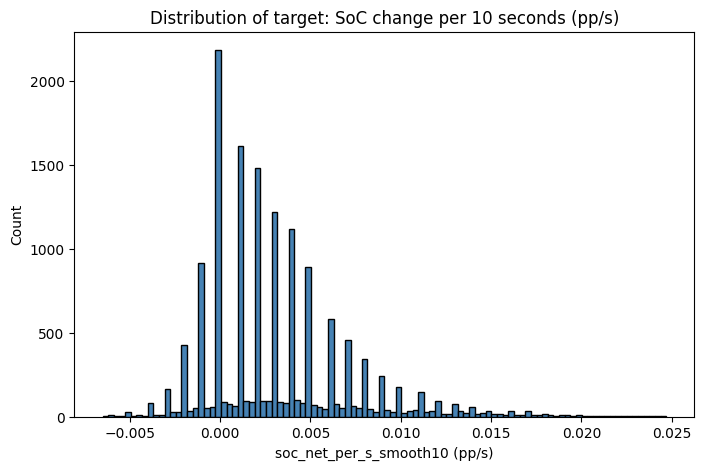

In [149]:
plt.figure(figsize=(8,5))
plt.hist(df["soc_net_per_s_smooth10"].dropna(), bins=100, color="steelblue", edgecolor="black")
plt.title("Distribution of target: SoC change per 10 seconds (pp/s)")
plt.xlabel("soc_net_per_s_smooth10 (pp/s)")
plt.ylabel("Count")

**Hedef Değişken Dağılımı 30 sn**

Text(0, 0.5, 'Count')

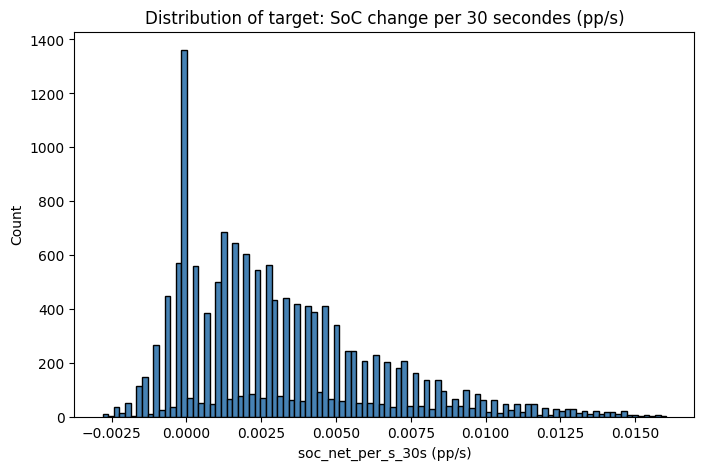

In [150]:
plt.figure(figsize=(8,5))
plt.hist(df["soc_net_per_s_30s"].dropna(), bins=100, color="steelblue", edgecolor="black")
plt.title("Distribution of target: SoC change per 30 secondes (pp/s)")
plt.xlabel("soc_net_per_s_30s (pp/s)")
plt.ylabel("Count")

**Hedef Değişken Dağılımı 60 sn**

Text(0, 0.5, 'Count')

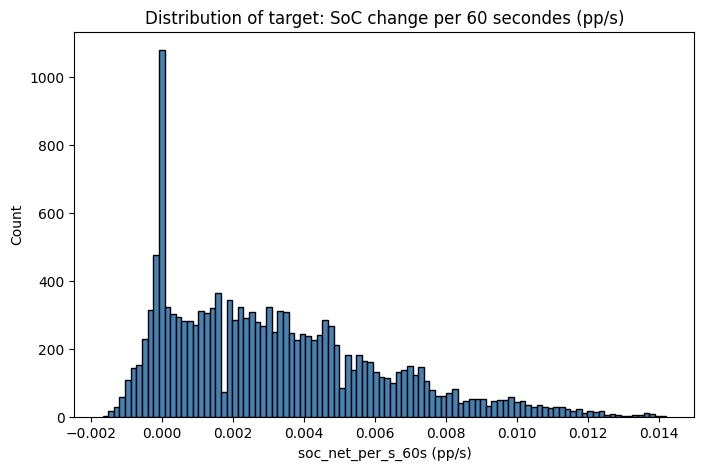

In [151]:
plt.figure(figsize=(8,5))
plt.hist(df["soc_net_per_s_60s"].dropna(), bins=100, color="steelblue", edgecolor="black")
plt.title("Distribution of target: SoC change per 60 secondes (pp/s)")
plt.xlabel("soc_net_per_s_60s (pp/s)")
plt.ylabel("Count")

## 5)  Özelliklerin İlişkisi

Bu bölümde SoC ile diğer değişkenler arasındaki ilişkiler incelenmiştir.
Amaç, hangi değişkenlerin daha fazla etkilediğini anlamaktır.

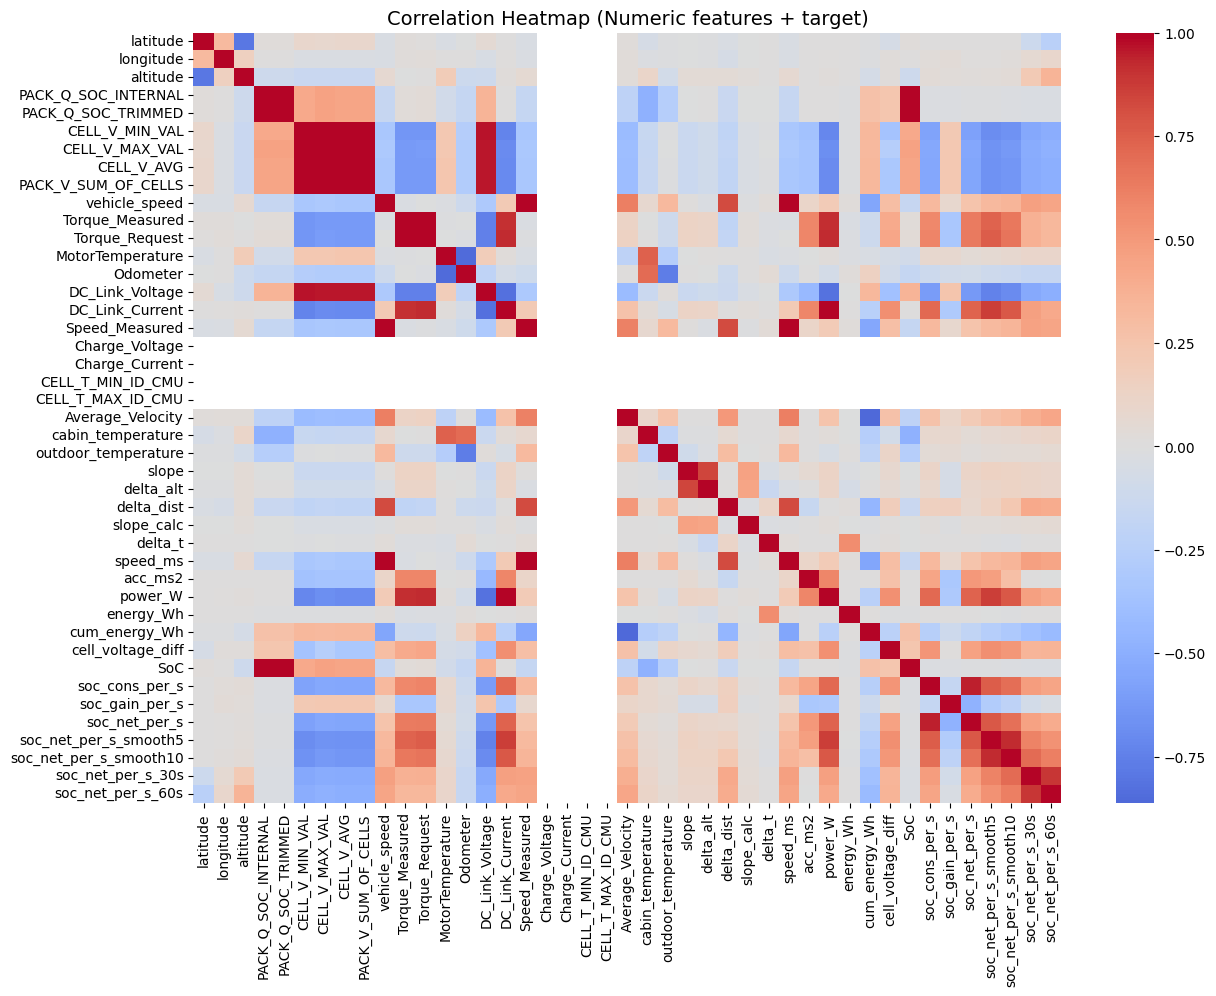

In [152]:
#Korelasyon matrisi
numeric_cols = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(14,10))
corr = df[numeric_cols].corr()

sns.heatmap(corr, cmap="coolwarm", center=0, annot=False, cbar=True)
plt.title("Correlation Heatmap (Numeric features + target)", fontsize=14)
plt.show()


## 6) Özellik Seçimi
Analiz sonucunda enerji tüketimi ile anlamlı ilişkisi olan değişkenler seçilmiş,
gereksiz veya sabit kalan değişkenler veri setinden çıkarılmıştır.

In [153]:
DROP_COLS = [
    # zaman ve konum
    "Time_Stamp", "latitude", "longitude", "altitude", "Odometer",

    # göstergeler ve kategorik kontrol değişkenleri
    "right_indicator", "left_indicator_st", "brightness_st", "charging_status",
    "charging_plug_feedback", "park_brake_st", "R_position_selected", "D_position_selected",

    # şarj ile ilgili
    "Torque_Request", "Charge_Voltage", "Charge_Current", "estimated_charging_time",

    # hücre ve paket SOC/voltaj değerleri
    "PACK_Q_SOC_INTERNAL", "PACK_Q_SOC_TRIMMED", "CELL_V_MIN_VAL", "CELL_V_MAX_VAL",
    "PACK_V_SUM_OF_CELLS", "CELL_T_MIN_ID_CMU", "CELL_T_MAX_ID_CMU",

    # ölçüm tekrarları
    "vehicle_speed", "Speed_Measured", #"Average_Velocity",

    # ortam ve sıcaklık
    "cabin_temperature", "outdoor_temperature",

    # türetilmiş / redundant değişkenler
    "delta_alt", "delta_dist", "slope_calc", "delta_t",

    # hedef ve türevleri
    "SoC", "soc_cons_per_s", "soc_gain_per_s",

    # enerji/kuvvet
     "energy_Wh", "cum_energy_Wh"
]

# Temiz veri seti
df_model = df.drop(columns=[c for c in DROP_COLS if c in df.columns], errors="ignore")

df_model.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14657 entries, 0 to 14656
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CELL_V_AVG              14657 non-null  float64
 1   Torque_Measured         14657 non-null  float64
 2   MotorTemperature        14657 non-null  float64
 3   DC_Link_Voltage         14657 non-null  float64
 4   DC_Link_Current         14657 non-null  float64
 5   Average_Velocity        14657 non-null  int64  
 6   Load                    14657 non-null  object 
 7   Direction               14657 non-null  object 
 8   Season                  14657 non-null  object 
 9   slope                   14657 non-null  float64
 10  speed_ms                14657 non-null  float64
 11  acc_ms2                 14657 non-null  float64
 12  power_W                 14657 non-null  float64
 13  cell_voltage_diff       14657 non-null  float64
 14  soc_net_per_s           14657 non-null

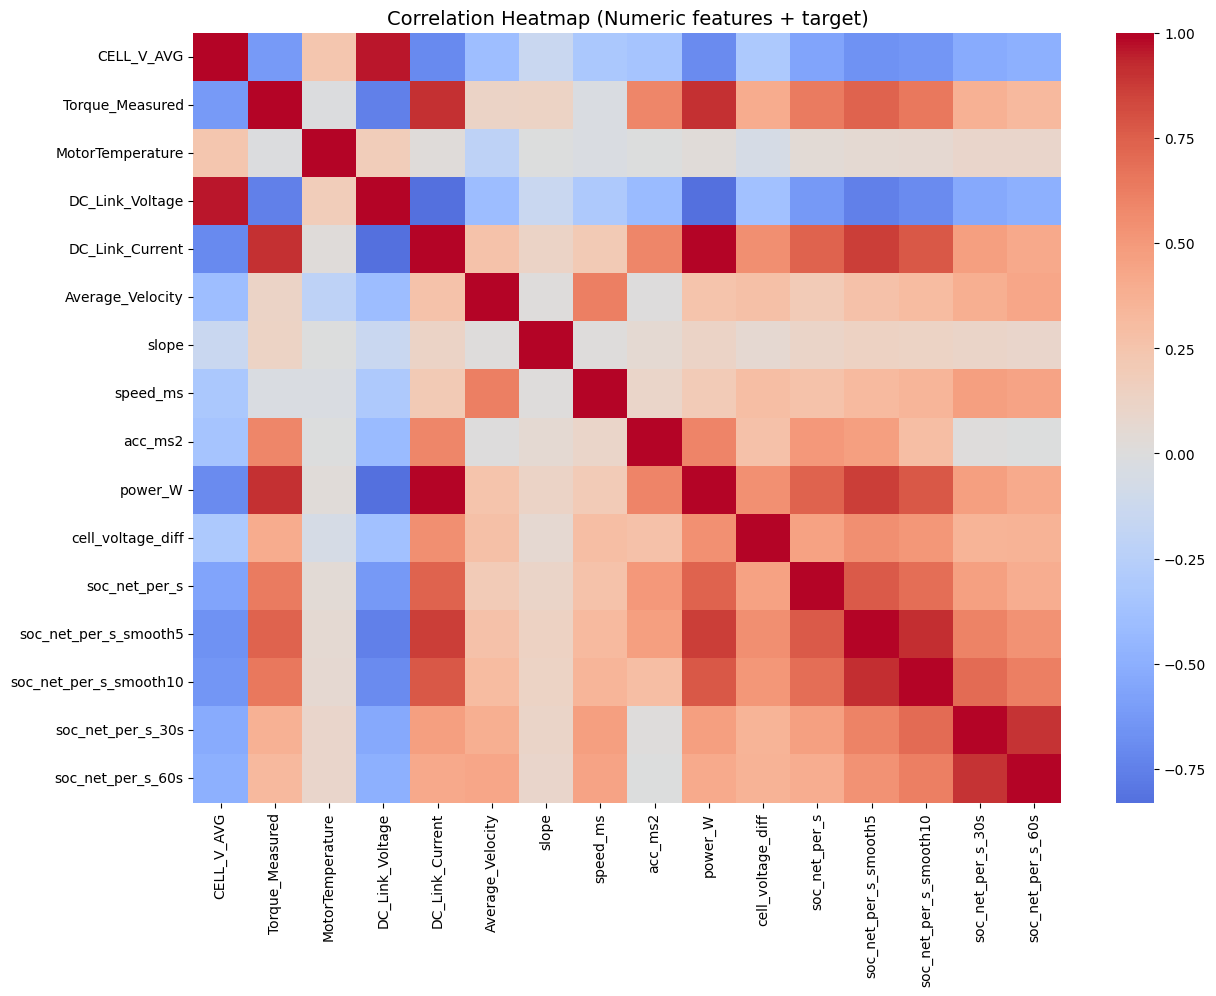

In [154]:
numeric_cols = df_model.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(14,10))
corr = df_model[numeric_cols].corr()

sns.heatmap(corr, cmap="coolwarm", center=0, annot=False, cbar=True)
plt.title("Correlation Heatmap (Numeric features + target)", fontsize=14)
plt.show()



- **DC_Link_Current → soc_net_per_s**: Güçlü **pozitif korelasyon**. Akım arttıkça SOC daha hızlı düşer.  

- **speed_ms → soc_net_per_s**: Orta düzey **pozitif korelasyon**. Araç hızı yükseldikçe tüketim artar.  

- **acc_ms2 → soc_net_per_s**: Orta düzey **pozitif korelasyon**. Ani ivmeler SOC tüketimini artırır.  

- **slope → soc_net_per_s**: **Pozitif korelasyon**. Yokuş çıkışlarında SOC tüketimi artar.  

- **Torque_Measured → soc_net_per_s**: **Pozitif korelasyon**. Tork yükseldikçe enerji tüketimi de artar.  

- **MotorTemperature → soc_net_per_s**: Orta düzey **pozitif korelasyon**. Yüksek güç çekildikçe motor sıcaklığı artar.  

- **CELL_V_AVG → soc_net_per_s**: **Negatif korelasyon**. Ortalama hücre voltajı düştükçe SOC daha hızlı azalır.  

- **DC_Link_Voltage → soc_net_per_s**: **Negatif korelasyon**. Gerilim düştüğünde batarya daha hızlı tüketim eğilimindedir.  

- **cell_voltage_diff → soc_net_per_s**: Hafif **pozitif korelasyon**. Hücreler arası dengesizlik arttığında tüketim artabilir.  


## 7)  Model İçin Veri Setinin Kaydedilmesi

In [155]:
df_model.to_csv("ev_dataset_multi_target.csv", index=False)
print("Model için hazır veri 'ev_dataset_prepared.csv' olarak kaydedildi.")

Model için hazır veri 'ev_dataset_prepared.csv' olarak kaydedildi.
